In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

pd.set_option('display.max_rows', 1000)
pd.set_option('display.float_format', '{:.2f}'.format)

import warnings
warnings.filterwarnings('ignore')

# 임금변화율 연평균 성장률을 통해 유니콘 기업 상위 50개 기업 도출

## 이전에 만들어놓은 데이터셋 Load

* uni : 기존 유니콘 기업 관련 데이터 <br>
* df : 제공받은 데이터 --> 2개년도 이상만 존재하는 데이터로 변경 후 분석 진행

In [17]:
df = pd.read_csv('./company_nps_data.csv', encoding='cp949')
uni = pd.read_csv('./제공데이터_연금보험료.csv', index_col=0)
print(df.shape)
print(uni.shape)

(99801, 6)
(550, 7)


In [18]:
display(uni.head())
display(df.head())

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,월연금보험료/월직원수
0,지피클럽,22474017,2015,11,733104.00,8,91638.00
1,지피클럽,22474017,2015,12,745068.00,7,106438.29
2,지피클럽,48329929,2016,1,551118.00,7,78731.14
3,지피클럽,48329929,2016,2,488133.00,7,69733.29
4,지피클럽,48329929,2016,3,1073632.00,7,153376.00


,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
0,233757,41688077,2018,7,8912380,36
1,123464,1760695,2018,3,942380,5
2,342124,3221341,2018,7,781180,4
3,386420,4815584,2015,11,3795900,14
4,129243,9799736,2018,10,40724680,151


## 제공데이터 월연금보험료/월직원수 계산

In [19]:
df['월연금보험료/월직원수'] = df['월별_연금보험료']/df['월별_직원수']
df.head()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,월연금보험료/월직원수
0,233757,41688077,2018,7,8912380,36,247566.11
1,123464,1760695,2018,3,942380,5,188476.00
2,342124,3221341,2018,7,781180,4,195295.00
3,386420,4815584,2015,11,3795900,14,271135.71
4,129243,9799736,2018,10,40724680,151,269699.87


## 기존 유니콘기업 데이터-연평균 성장률 계산을 용이하게 하기 위해 피봇테이블 생성(uni2)

In [20]:
uni.head()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,월연금보험료/월직원수
0,지피클럽,22474017,2015,11,733104.00,8,91638.00
1,지피클럽,22474017,2015,12,745068.00,7,106438.29
2,지피클럽,48329929,2016,1,551118.00,7,78731.14
3,지피클럽,48329929,2016,2,488133.00,7,69733.29
4,지피클럽,48329929,2016,3,1073632.00,7,153376.00


In [23]:
uni2 = uni.pivot_table(index='회사ID', columns='년도', values='월연금보험료/월직원수')
uni2

년도,2015,2016,2017,2018,2019
회사ID,,,,,
무신사,93344.45,97955.25,106840.89,117678.16,133904.69
쏘카,108904.19,100505.18,91384.62,106823.75,127966.22
야놀자,117441.23,108066.54,123614.54,135277.54,153600.66
에이프로젠,110028.26,114412.86,117228.66,115682.15,121040.88
엘앤피코스메틱,129905.23,128797.15,132366.36,140786.49,147293.71
옐로모바일,147648.81,144737.59,147248.42,152522.44,155186.29
우아한형제들,1342831.73,1409297.51,1503911.06,1596297.53,1737258.34
지피클럽,99038.14,110576.32,105007.92,123932.05,117878.67
쿠팡,132902.60,132130.67,132789.13,137369.59,142307.14


## 제공받은 데이터(df)에서 최소 2개년도 이상 데이터 존재하는 기업만 남김(df4)

In [24]:
df.head()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,월연금보험료/월직원수
0,233757,41688077,2018,7,8912380,36,247566.11
1,123464,1760695,2018,3,942380,5,188476.00
2,342124,3221341,2018,7,781180,4,195295.00
3,386420,4815584,2015,11,3795900,14,271135.71
4,129243,9799736,2018,10,40724680,151,269699.87


In [30]:
df2 = df.pivot_table(index=['회사ID', '년도'], values='월연금보험료/월직원수')
df2 = df2.reset_index()
print(df2.shape)
df2.head()

(10109, 3)


,회사ID,년도,월연금보험료/월직원수
0,63,2018,407239.47
1,95,2018,397193.20
2,102,2018,231111.80
3,295,2018,298169.58
4,414,2018,313382.16


In [49]:
df2.iloc[50:60, :]

,회사ID,년도,월연금보험료/월직원수
50,13948,2018,380184.12
51,14181,2018,266914.74
52,14271,2015,235527.82
53,14271,2016,246262.68
54,14271,2017,218312.84
55,14271,2018,210208.93
56,14271,2019,213832.73
57,14422,2018,164573.52
58,14462,2018,190032.59
59,14667,2018,145714.36


* 예시로, index가 52~56인 경우 회사ID가 14271로 중복됨
* 이런 데이터만 남기면 됨

In [57]:
df2[df2.duplicated('회사ID', keep=False)].head(8)

,회사ID,년도,월연금보험료/월직원수
52,14271,2015,235527.82
53,14271,2016,246262.68
54,14271,2017,218312.84
55,14271,2018,210208.93
56,14271,2019,213832.73
164,44851,2016,184970.55
165,44851,2018,227407.50
222,59533,2015,90088.00


* pandas의 dupiicated()함수 사용하면 됨.
* 이때, keep=False로 설정해야 중복되는 모든 행을 남길 수 있음(default값은 first)
* 예시로, index 52~56까지 중복되는 14271 회사를 보여주는 것을 확인할 수 있음

In [62]:
duplicate_data = df2.duplicated('회사ID', keep=False).loc[df2.duplicated('회사ID', keep=False)].index.tolist()
len(duplicate_data)

7700

In [63]:
df3 = df2.loc[df2.index.isin(duplicate_data)]
print(df3.shape)
print(df3['회사ID'].nunique())
df3.head()

(7700, 3)
2589


,회사ID,년도,월연금보험료/월직원수
52,14271,2015,235527.82
53,14271,2016,246262.68
54,14271,2017,218312.84
55,14271,2018,210208.93
56,14271,2019,213832.73


In [75]:
df4 = df3.pivot_table(index='회사ID', columns='년도', values='월연금보험료/월직원수')
print(df4.shape)
df4.head()

(2589, 5)


년도,2015,2016,2017,2018,2019
회사ID,,,,,
14271,235527.82,246262.68,218312.84,210208.93,213832.73
44851,NaN,184970.55,NaN,227407.50,NaN
59533,90088.00,91392.06,91044.56,90705.42,NaN
122968,209669.32,215674.28,222730.36,212510.30,NaN
122983,198738.76,207154.75,215582.28,NaN,NaN


In [84]:
df4['기간수'] = 0

In [85]:
for i in range(len(df4)):
    df4.iloc[i, 5] = df4.iloc[i].notnull().sum() - 2

df4.head()

년도,2015,2016,2017,2018,2019,기간수
회사ID,,,,,,
14271,235527.82,246262.68,218312.84,210208.93,213832.73,4
44851,NaN,184970.55,NaN,227407.50,NaN,1
59533,90088.00,91392.06,91044.56,90705.42,NaN,3
122968,209669.32,215674.28,222730.36,212510.30,NaN,3
122983,198738.76,207154.75,215582.28,NaN,NaN,2


### 결측치 처리

연평균 성장률 공식에서 중요한 것은 초기값(시작값)과 종료값이므로, 앞뒤 값으로 결측치를 채워도 됨

In [86]:
df5 = df4[[2015, 2016, 2017, 2018, 2019]].copy()

In [87]:
df5.T.fillna(method='ffill', inplace=True)
df5.T.fillna(method='bfill', inplace=True)
df5.head()

년도,2015,2016,2017,2018,2019
회사ID,,,,,
14271,235527.82,246262.68,218312.84,210208.93,213832.73
44851,184970.55,184970.55,184970.55,227407.50,227407.50
59533,90088.00,91392.06,91044.56,90705.42,90705.42
122968,209669.32,215674.28,222730.36,212510.30,212510.30
122983,198738.76,207154.75,215582.28,215582.28,215582.28


In [91]:
df5['기간수'] = df4['기간수']
df5.head()

년도,2015,2016,2017,2018,2019,기간수
회사ID,,,,,,
14271,235527.82,246262.68,218312.84,210208.93,213832.73,4
44851,184970.55,184970.55,184970.55,227407.50,227407.50,1
59533,90088.00,91392.06,91044.56,90705.42,90705.42,3
122968,209669.32,215674.28,222730.36,212510.30,212510.30,3
122983,198738.76,207154.75,215582.28,215582.28,215582.28,2


## 연평균 성장률 공식

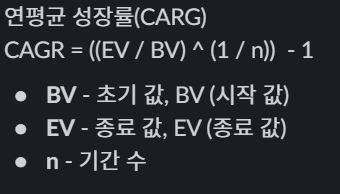

In [8]:
from IPython.display import Image
Image("./리서치/week1/img/연평균 성장률 공식.JPG")

### 기존 유니콘기업 데이터(uni2) 연평균 성장률 계산

In [74]:
uni2.head(3)

년도,2015,2016,2017,2018,2019
회사ID,,,,,
무신사,93344.45,97955.25,106840.89,117678.16,133904.69
쏘카,108904.19,100505.18,91384.62,106823.75,127966.22
야놀자,117441.23,108066.54,123614.54,135277.54,153600.66


In [94]:
# 기존 유니콘기업 데이터는 2015~2019년까지 결측치 없이 데이터가 다 있으므로 기간수 = 4
uni2['기간수'] = 4
uni2.head()

년도,2015,2016,2017,2018,2019,기간수
회사ID,,,,,,
무신사,93344.45,97955.25,106840.89,117678.16,133904.69,4
쏘카,108904.19,100505.18,91384.62,106823.75,127966.22,4
야놀자,117441.23,108066.54,123614.54,135277.54,153600.66,4
에이프로젠,110028.26,114412.86,117228.66,115682.15,121040.88,4
엘앤피코스메틱,129905.23,128797.15,132366.36,140786.49,147293.71,4


In [96]:
uni2['연평균 성장률(%)'] = ((uni2[2019]/uni2[2015]) ** (1/uni2['기간수']) - 1) * 100
uni2.head()

년도,2015,2016,2017,2018,2019,기간수,연평균 성장률(%)
회사ID,,,,,,,
무신사,93344.45,97955.25,106840.89,117678.16,133904.69,4,9.44
쏘카,108904.19,100505.18,91384.62,106823.75,127966.22,4,4.11
야놀자,117441.23,108066.54,123614.54,135277.54,153600.66,4,6.94
에이프로젠,110028.26,114412.86,117228.66,115682.15,121040.88,4,2.41
엘앤피코스메틱,129905.23,128797.15,132366.36,140786.49,147293.71,4,3.19


### 기존 유니콘기업의 임금변화율 연평균 성장률 최솟값

In [97]:
uni2.describe()

년도,2015,2016,2017,2018,2019,기간수,연평균 성장률(%)
count,11.00,11.00,11.00,11.00,11.00,11.00,11.00
mean,332675.42,346986.41,381093.13,410404.51,442571.70,4.00,5.08
std,473545.52,506524.61,576211.00,620364.39,670807.43,0.00,3.09
min,93344.45,97955.25,91384.62,106823.75,117878.67,4.00,1.25
25%,109466.22,109321.43,112034.78,120805.11,130935.45,4.00,2.80
50%,129905.23,128797.15,132366.36,137369.59,147293.71,4.00,4.45
75%,145350.92,141787.40,145965.78,155148.57,164302.07,4.00,6.80
max,1342831.73,1409297.51,1586949.71,1730305.28,1858434.23,4.00,10.77


#### 소거 기준: 기존 유니콘기업의 임금변화율 연평균 성장률 최솟값 1.25% 미만

### 가공한 데이터 (df5) 연평균 성장률 계산

In [99]:
df5.head()

년도,2015,2016,2017,2018,2019,기간수
회사ID,,,,,,
14271,235527.82,246262.68,218312.84,210208.93,213832.73,4
44851,184970.55,184970.55,184970.55,227407.50,227407.50,1
59533,90088.00,91392.06,91044.56,90705.42,90705.42,3
122968,209669.32,215674.28,222730.36,212510.30,212510.30,3
122983,198738.76,207154.75,215582.28,215582.28,215582.28,2


In [101]:
df5['연평균 성장률(%)'] = ((df5[2019]/df5[2015]) ** (1/df5['기간수']) - 1) * 100
print(df5.shape)
df5.head()

(2589, 7)


년도,2015,2016,2017,2018,2019,기간수,연평균 성장률(%)
회사ID,,,,,,,
14271,235527.82,246262.68,218312.84,210208.93,213832.73,4,-2.39
44851,184970.55,184970.55,184970.55,227407.50,227407.50,1,22.94
59533,90088.00,91392.06,91044.56,90705.42,90705.42,3,0.23
122968,209669.32,215674.28,222730.36,212510.30,212510.30,3,0.45
122983,198738.76,207154.75,215582.28,215582.28,215582.28,2,4.15


In [105]:
df6 = df5.loc[df5['연평균 성장률(%)'] >= 1.25]
data = df6.sort_values(by='연평균 성장률(%)', ascending=False)
print(data.shape)

(1946, 7)


# 임금변화율 연평균 성장률 상위 50개 기업

In [111]:
data_top50 = data['연평균 성장률(%)'].head(60).to_frame().reset_index()
display(data_top50.head(10))
data_top50.to_excel('./임금변화율_연평균성장률_top50.xlsx')

,회사ID,연평균 성장률(%)
0,478999,276.79
1,515562,226.54
2,124581,191.71
3,472629,161.71
4,146381,111.88
5,254150,110.77
6,419289,98.81
7,513441,88.02
8,172373,80.25
9,291300,77.83
